# **LAB 9: Gale-Shapley and Irving Algorithms**

Jonathan Andrés Jiménez Trujillo



# ***1*** Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.

  Gale–Shapley algorithm simply explained – [towardsdatascience](https://towardsdatascience.com/gale-shapley-algorithm-simply-explained-caa344e643c2)

  Stable Marriage Problem – [geeksforgeeks](https://www.geeksforgeeks.org/stable-marriage-problem/)
  
  Stable matching, as a game – [towardsdatascience.com](https://towardsdatascience.com/stable-matching-as-a-game-a68c279d70b)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from copy import copy
import string

## Definicion lista de alfabetos

In [2]:
alphabet_string = string.ascii_uppercase
alphabet_string2 = string.ascii_lowercase
alphabet_list = list(alphabet_string)
alphabet_list2 = list(alphabet_string2)
a = []
a2 = []
for letter in alphabet_list:
  x = letter+letter
  a.append(x)
for letter in alphabet_list2:
  x = letter+letter
  a2.append(x)
myAlphabetWomen = alphabet_list + a
myAlphabetMen = alphabet_list2 + a2
print(myAlphabetWomen)
print(myAlphabetMen)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'BB', 'CC', 'DD', 'EE', 'FF', 'GG', 'HH', 'II', 'JJ', 'KK', 'LL', 'MM', 'NN', 'OO', 'PP', 'QQ', 'RR', 'SS', 'TT', 'UU', 'VV', 'WW', 'XX', 'YY', 'ZZ']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'aa', 'bb', 'cc', 'dd', 'ee', 'ff', 'gg', 'hh', 'ii', 'jj', 'kk', 'll', 'mm', 'nn', 'oo', 'pp', 'qq', 'rr', 'ss', 'tt', 'uu', 'vv', 'ww', 'xx', 'yy', 'zz']


## **Metodo para obtener labels de n hombres y n mujeres**

In [3]:
def obtener_hombres(n):
  lista = []
  for i in range(1,n+1):
    s = 'H'
    Mi = s+ str(i)
    lista.append(Mi)
  return lista

def obtener_mujeres(n):
  lista = []
  for i in range(1,n+1):
    s = 'M'
    Mi = s+ str(i)
    lista.append(Mi)
  return lista

## **Funciones para crear diccionarios tanto para hombres como mujeres**

In [4]:
def diccionario_mujeres(n,listas):
  women_list = obtener_mujeres(n)
  d = {} 
  for i in range(len(women_list)):
    d[women_list[i]] = listas[i]
  return d

def diccionario_hombres(n,listas):
  #Trasponer la lista de preferencia, pues es necesario para el dataframe
  man_list = obtener_mujeres(n)
  listas = list(map(list, zip(*listas)))
  d = {}
  for i in range(len(man_list)):
    d[man_list[i]] = listas[i]
  return d

##**Función crear dataframe**


In [5]:
def dataframe_mujeres(n,listas):
  women_df = pd.DataFrame(diccionario_mujeres(n,listas))
  man_list = obtener_hombres(n)
  women_df.index = man_list
  return women_df

def dataframe_hombres(n,listas):
  man_df = pd.DataFrame(diccionario_hombres(n,listas))
  man_list = obtener_hombres(n)
  man_df.index = man_list
  return man_df

## **Algoritmo**

El algoritmo de Gale-Shapley fue obtenido de https://towardsdatascience.com/gale-shapley-algorithm-simply-explained-caa344e643c2

In [6]:
def gale_shapley(n, preferencias_mujeres, preferencias_hombres):
  man_list = obtener_hombres(n)
  women_list = obtener_mujeres(n)
  women_df = dataframe_mujeres(n,preferencias_mujeres)
  man_df = dataframe_hombres(n, preferencias_hombres)
  women_available = {man:women_list for man in man_list}
  waiting_list = []
  proposals = {}
  count = 0
  while len(waiting_list)<len(man_list):
      for man in man_list:
          if man not in waiting_list:
              women = women_available[man]
              
              best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
              proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                  women_df.loc[man][best_choice])
      overlays = Counter([key[1] for key in proposals.keys()])
      for women in overlays.keys():
          if overlays[women]>1:
              pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                      if women in pair}.items(), 
                    key=lambda x: x[1][1]
                    )[1:]
              for p_to_drop in pairs_to_drop:
                  del proposals[p_to_drop[0]]
                  _women = copy(women_available[p_to_drop[0][0]])
                  _women.remove(p_to_drop[0][1])
                  women_available[p_to_drop[0][0]] = _women
      waiting_list = [man[0] for man in proposals.keys()]
      count+=1
  return proposals, count

## ***Cambio de notacion de lista***

Esto con el fin de cambiar de una lista de preferencia a una lista de interes por persona

In [7]:
def pasar_notacion(lista):
  l = len(lista)
  respuesta =[0]*l
  for i in range(l):
    respuesta[lista[i]-1]= i+1
  return respuesta


def pasar_notaciones(listas):
  l = len(listas)
  for i in range(l):
    listas[i] = pasar_notacion(listas[i])
  return listas

## ***Algortimo Gale-Shapley para listas de preferencia***

In [8]:
def Gale_Shapley_match_preference_lists(n, preferencias_mujeres, preferencias_hombres):

  pm = pasar_notaciones(preferencias_mujeres) 
  ph = pasar_notaciones(preferencias_hombres)
  p,c = gale_shapley(n, pm, ph)
  return p,c

## ***Peor caso***
Worst Case scenario

https://stackoverflow.com/questions/36381702/worst-case-for-stable-matchings para encontrar el peor escenario se tiene que recorrer todas las opciones posibles hasta llegar al matrimonio estable

### ***Funcion para obtener las listas de preferencia de las mujeres en un peor caso***

In [9]:
def obtener_lista_1_a_n(n):
  return list(range(1,n+1))


def obtener_lista_i_a_n(i,n):
  return list(range(i,n+1))

def peor_caso_hombres(n):
  matriz =[]
  for i in range(1,n+1):
    corte1 = obtener_lista_i_a_n(i,n-1)
    #print(corte1)
    corte2 = obtener_lista_1_a_n(i-1)+ [n]
    #print(corte2)
    fila = corte1 + corte2
    matriz.append(fila)
  return matriz



def peor_caso_mujeres(n):
  matriz =[]
  for i in range(1,n+1):
    corte1 = obtener_lista_i_a_n(i+1,n)
    #print(corte1)
    corte2 = obtener_lista_1_a_n(i)
    #print(corte2)
    fila = corte1 + corte2
    matriz.append(fila)

  #matriz[1] = matriz[0][0:3]+[n]
  
  return matriz

### **Funcion para correr el algoritmo Gale-Shapley para n usando un peor caso**

In [10]:
def matching_peor_caso_Gale_Shapley(n):

  MP_M = peor_caso_mujeres(n)
  MP_H = peor_caso_hombres(n)  

  parejas, iteraciones = Gale_Shapley_match_preference_lists(n, MP_M, MP_H)
  return parejas, iteraciones

**n=4**

In [11]:
phom = [[1,2,3,4],
        [2,3,1,4],
        [3,1,2,4],
        [1,2,3,4]]

pmuj = [[2,3,4,1],
        [3,4,1,2],
        [4,1,2,3],
        [1,2,3,4]]


parejas, iteraciones = Gale_Shapley_match_preference_lists(4,pmuj,phom)
print("Numero de iteraciones peor caso para n=4: ", iteraciones)
print("\nEmparejamiento estable para el peor caso con n=4")
parejas

Numero de iteraciones peor caso para n=4:  10

Emparejamiento estable para el peor caso con n=4


{('H1', 'M4'): (4, 1),
 ('H2', 'M1'): (3, 1),
 ('H3', 'M2'): (3, 1),
 ('H4', 'M3'): (3, 1)}

***n=40***

In [12]:
matches, iterations = matching_peor_caso_Gale_Shapley(40)
print("Iteraciones para hallar el peor caso con n=40: ",iterations)

print("\n\n\n\nListas de preferencia de los hombres\n")
ch = 1

MPM = peor_caso_mujeres(40)
MPH = peor_caso_hombres(40)

for fila in MPH:
    label = 'H'+str(ch)+':   '
    print(label,*fila)
    ch = ch +1

print("\n\nListas de preferencia de las mujeres\n")
cm = 1
for fila in MPM:
    label = 'M'+str(cm)+':   '
    print(label,*fila)
    cm = cm +1

print("\n\n\n\n\nEmparejamiento estable y preferencia lograda de cada persona a su pareja\n")
matches

Iteraciones para hallar el peor caso con n=40:  1522




Listas de preferencia de los hombres

H1:    1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
H2:    2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 1 40
H3:    3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 1 2 40
H4:    4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 1 2 3 40
H5:    5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 1 2 3 4 40
H6:    6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 1 2 3 4 5 40
H7:    7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 1 2 3 4 5 6 40
H8:    8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32

{('H1', 'M40'): (40, 1),
 ('H10', 'M9'): (39, 1),
 ('H11', 'M10'): (39, 1),
 ('H12', 'M11'): (39, 1),
 ('H13', 'M12'): (39, 1),
 ('H14', 'M13'): (39, 1),
 ('H15', 'M14'): (39, 1),
 ('H16', 'M15'): (39, 1),
 ('H17', 'M16'): (39, 1),
 ('H18', 'M17'): (39, 1),
 ('H19', 'M18'): (39, 1),
 ('H2', 'M1'): (39, 1),
 ('H20', 'M19'): (39, 1),
 ('H21', 'M20'): (39, 1),
 ('H22', 'M21'): (39, 1),
 ('H23', 'M22'): (39, 1),
 ('H24', 'M23'): (39, 1),
 ('H25', 'M24'): (39, 1),
 ('H26', 'M25'): (39, 1),
 ('H27', 'M26'): (39, 1),
 ('H28', 'M27'): (39, 1),
 ('H29', 'M28'): (39, 1),
 ('H3', 'M2'): (39, 1),
 ('H30', 'M29'): (39, 1),
 ('H31', 'M30'): (39, 1),
 ('H32', 'M31'): (39, 1),
 ('H33', 'M32'): (39, 1),
 ('H34', 'M33'): (39, 1),
 ('H35', 'M34'): (39, 1),
 ('H36', 'M35'): (39, 1),
 ('H37', 'M36'): (39, 1),
 ('H38', 'M37'): (39, 1),
 ('H39', 'M38'): (39, 1),
 ('H4', 'M3'): (39, 1),
 ('H40', 'M39'): (39, 1),
 ('H5', 'M4'): (39, 1),
 ('H6', 'M5'): (39, 1),
 ('H7', 'M6'): (39, 1),
 ('H8', 'M7'): (39, 1),
 (

## ***Mejor caso***

### ***Funcion matriz mejor caso***
Para obtener la matriz que corresponda al mejor caso se codeo la siguiente funcion

In [13]:
def mejor_caso(n):
  
  matriz =[]

  #Construir n filas
  for i in range(1,n+1):
    corte1 = obtener_lista_i_a_n(i,n)
    #print(corte1)
    corte2 = obtener_lista_1_a_n(i-1)
    #print(corte2)
    fila = corte1 + corte2
    matriz.append(fila)

  #matriz[1] = matriz[0][0:3]+[n]
  
  return matriz

**n=4**

In [14]:
mc4 = mejor_caso(4)

phom = mc4
for fila in phom:
    print(*fila)
print("\n\n")

pmuj = mc4
for fila in pmuj:
    print(*fila)
print("\n\n")


parejas, iteraciones = Gale_Shapley_match_preference_lists(4,pmuj,phom)
print("Iteraciones experimento: ", iteraciones)
print("\nEmparejamiento estable")
parejas

1 2 3 4
2 3 4 1
3 4 1 2
4 1 2 3



1 2 3 4
2 3 4 1
3 4 1 2
4 1 2 3



Iteraciones experimento:  1

Emparejamiento estable


{('H1', 'M1'): (1, 1),
 ('H2', 'M4'): (1, 1),
 ('H3', 'M3'): (1, 1),
 ('H4', 'M2'): (1, 1)}

**n=40**

In [15]:
mc40 = mejor_caso(40)

phom = mc40
for fila in phom:
    print(*fila)
print("\n\n")

pmuj = mc40
for fila in pmuj:
    print(*fila)
print("\n\n")


parejas, iteraciones = Gale_Shapley_match_preference_lists(40,pmuj,phom)
print("Iteraciones experimento: ", iteraciones)
print("\nEmparejamiento estable")
parejas

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 1
3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 1 2
4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 1 2 3
5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 1 2 3 4
6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 1 2 3 4 5
7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 1 2 3 4 5 6
8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 1 2 3 4 5 6 7
9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 1 2 3 4 5 6 7 8
1

{('H1', 'M1'): (1, 1),
 ('H10', 'M32'): (1, 1),
 ('H11', 'M31'): (1, 1),
 ('H12', 'M30'): (1, 1),
 ('H13', 'M29'): (1, 1),
 ('H14', 'M28'): (1, 1),
 ('H15', 'M27'): (1, 1),
 ('H16', 'M26'): (1, 1),
 ('H17', 'M25'): (1, 1),
 ('H18', 'M24'): (1, 1),
 ('H19', 'M23'): (1, 1),
 ('H2', 'M40'): (1, 1),
 ('H20', 'M22'): (1, 1),
 ('H21', 'M21'): (1, 1),
 ('H22', 'M20'): (1, 1),
 ('H23', 'M19'): (1, 1),
 ('H24', 'M18'): (1, 1),
 ('H25', 'M17'): (1, 1),
 ('H26', 'M16'): (1, 1),
 ('H27', 'M15'): (1, 1),
 ('H28', 'M14'): (1, 1),
 ('H29', 'M13'): (1, 1),
 ('H3', 'M39'): (1, 1),
 ('H30', 'M12'): (1, 1),
 ('H31', 'M11'): (1, 1),
 ('H32', 'M10'): (1, 1),
 ('H33', 'M9'): (1, 1),
 ('H34', 'M8'): (1, 1),
 ('H35', 'M7'): (1, 1),
 ('H36', 'M6'): (1, 1),
 ('H37', 'M5'): (1, 1),
 ('H38', 'M4'): (1, 1),
 ('H39', 'M3'): (1, 1),
 ('H4', 'M38'): (1, 1),
 ('H40', 'M2'): (1, 1),
 ('H5', 'M37'): (1, 1),
 ('H6', 'M36'): (1, 1),
 ('H7', 'M35'): (1, 1),
 ('H8', 'M34'): (1, 1),
 ('H9', 'M33'): (1, 1)}

# ***2*** Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

In [16]:
def gale_shapley(women_list, man_list, women_df,man_df):
  # dict to control which women each man can make proposals
  women_available = {man:women_list for man in man_list}
  # waiting list of men that were able to create pair on each iteration
  waiting_list = []
  # dict to store created pairs
  proposals = {}
  # variable to count number of iterations
  count = 0
  # while not all men have pairs
  while len(waiting_list)<len(man_list):
      # man makes proposals
      for man in man_list:
          if man not in waiting_list:
              # each man make proposal to the top women from it's list
              women = women_available[man]
              
              best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
              proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                  women_df.loc[man][best_choice])
      # if women have more than one proposals 
      # she will choose the best option
      overlays = Counter([key[1] for key in proposals.keys()])
      # cycle to choose the best options
      for women in overlays.keys():
          if overlays[women]>1:
              # pairs to drop from proposals
              pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                      if women in pair}.items(), 
                    key=lambda x: x[1][1]
                    )[1:]
              # if man was rejected by woman
              # there is no pint for him to make proposal 
              # second time to the same woman
              for p_to_drop in pairs_to_drop:
                  del proposals[p_to_drop[0]]
                  _women = copy(women_available[p_to_drop[0][0]])
                  _women.remove(p_to_drop[0][1])
                  women_available[p_to_drop[0][0]] = _women
      # man who successfully created pairs must be added to the waiting list 
      waiting_list = [man[0] for man in proposals.keys()]
      # update counter
      count+=1
  return count

Se define la función `run100times(n)` que recibe como parametro el numero de parejas que se quieren formar

In [17]:
def run100times(n):
  women_list = myAlphabetWomen[0:n]
  men_list = myAlphabetMen[0:n]
  women_perms = []
  men_perms = []
  iterations = []
  wdict = {}
  mdict = {}
  for i in range(100):
    warr = []
    marr = []
    for k in range(n):
      warr.append(np.random.permutation(n) + 1)
      wdict[women_list[k]] = warr[k]      
      marr.append(np.random.permutation(n) + 1)
      mdict[women_list[k]] = warr[k]   
    
    women_df = pd.DataFrame(wdict)
    women_df.index = men_list
    
    df = pd.DataFrame(mdict)
    men_df = df.T
    men_df.columns = women_list
    men_df.index = men_list
    iterations.append(gale_shapley(women_list, men_list, women_df,men_df))
   
  return iterations

## **n=4**

[3, 4, 3, 2, 2, 2, 1, 4, 4, 4, 2, 4, 2, 3, 2, 5, 3, 2, 4, 4, 3, 3, 4, 1, 6, 3, 1, 2, 4, 4, 5, 2, 3, 2, 4, 2, 3, 4, 3, 4, 2, 4, 2, 5, 3, 3, 6, 3, 3, 3, 2, 2, 3, 2, 5, 2, 4, 3, 2, 1, 3, 4, 4, 2, 2, 1, 2, 3, 1, 3, 4, 2, 1, 2, 2, 7, 5, 4, 2, 3, 3, 2, 5, 4, 1, 3, 3, 4, 4, 3, 3, 4, 3, 5, 2, 3, 2, 3, 2, 2]
Mínimo:  1
Máximo:  7
Promedio:  3.01


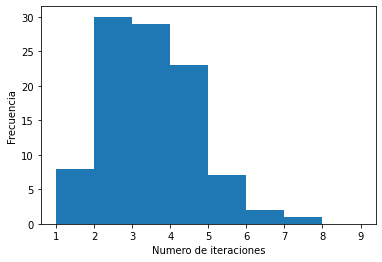

In [18]:
its_n4 = run100times(4)
print(its_n4)
print("Mínimo: ", min(its_n4))
print("Máximo: ", max(its_n4))
print("Promedio: ", sum(its_n4)/len(its_n4))
plt.hist(its_n4,bins=[1,2,3,4,5,6,7,8,9])

plt.xlabel('Numero de iteraciones')
plt.ylabel('Frecuencia')
plt.show()

##**n=40**

Mínimo:  11
Máximo:  147
Promedio:  58.94


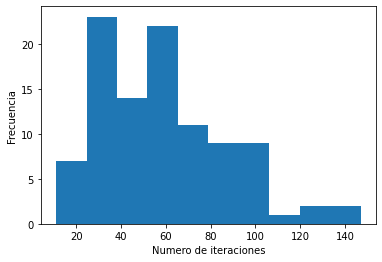

In [19]:
y = run100times(40)
print("Mínimo: ", min(y))
print("Máximo: ", max(y))
print("Promedio: ", sum(y)/len(y))
plt.hist(y)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Frecuencia')
plt.show()